<a href="https://colab.research.google.com/github/AryaWiratama26/citra/blob/main/Pengolahan_Citra_Pertemuan_7_Arya_Wiratama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library, Membaca gambar, dan Menampilkan gambar
- Mengimport library cv2 (opencv), numpy, dan matplotlib yang akan digunakan untuk manipulasi gambar
- Variable image untuk membaca gambar dengan method imread()
- Lalu jika gambar is None, maka akan muncul persan "Error: Could not open or ead the image file."
- Gambar akan ditampilkan dalam bentuk greyscale

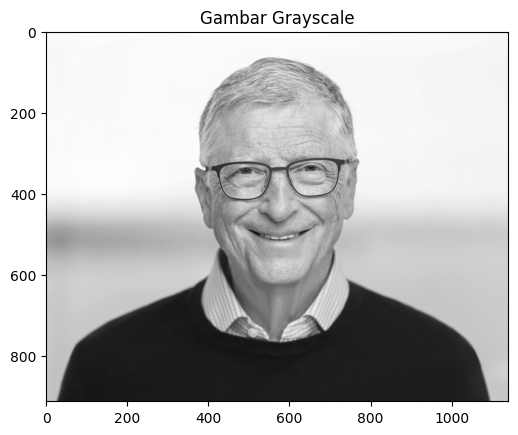

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Membaca gambar dalam format grayscale
image = cv2.imread('/content/bill-gates_headshot_5x4.webp', 0)

if image is None:
  print("Error: Could not open or read the image file.")
else:
  # Display the image using matplotlib
  plt.imshow(image, cmap='gray')
  plt.title('Gambar Grayscale')
  plt.show()

# Melakukan konversi gambar ke biner
- cv2.threshold() adalah fungsi thresholding di OpenCV.

- Fungsinya adalah mengubah gambar grayscale menjadi gambar biner (hanya 2 warna: hitam atau putih).

- plt.imshow(binary_image, cmap='gray'): Menampilkan gambar hasil thresholding dalam mode abu-abu.

- plt.show(): Menampilkan plot-nya.

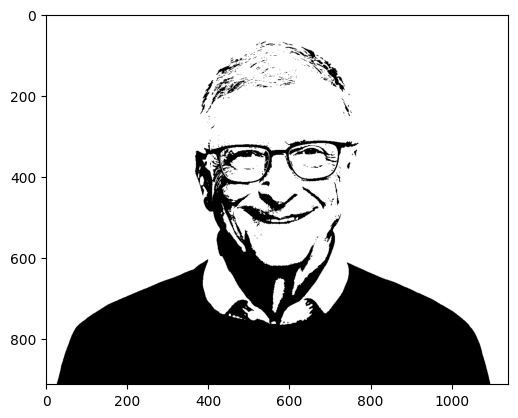

In [ ]:
# Konversi ke citra biner dengan threshold
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
import matplotlib.pyplot as plt
plt.imshow(binary_image, cmap='gray')
plt.show()

# Menampilkan semua hasil gambar

- kernel adalah array 5x5 yang semua elemennya bernilai 1.

- Tipe datanya np.uint8 (integer 8-bit).

- Ini disebut elemen struktural dalam morfologi citra — dipakai untuk operasi seperti erosi, dilasi, opening, closing.

- Erosi: membuat objek putih di gambar menyusut.

- Cara kerja: kernel digeser ke seluruh gambar → pixel putih yang tidak sepenuhnya dikelilingi putih akan menjadi hitam.

- Tujuan: menghilangkan noise putih kecil atau memperkecil objek.

- Dilasi / dilation: membuat objek putih di gambar membesar.

- Cara kerja: selama ada 1 pixel putih di dalam area kernel, semua pixel dalam area itu akan menjadi putih.

- Tujuan: mengisi lubang di dalam objek atau memperbesar objek.

- Opening = Erosi → Dilasi

- Tujuan:

- Menghilangkan noise putih kecil tanpa mengubah bentuk objek utama. Bagus untuk membersihkan bintik-bintik putih kecil.

- Closing = Dilasi → Erosi

- Tujuan:

- Menutup lubang kecil di dalam objek putih.

- Bagus untuk memperbaiki lubang atau celah dalam objek.

- titles: daftar judul untuk setiap gambar yang mau ditampilkan.

- images: daftar gambar-gambar yang mau ditampilkan.

- plt.figure(figsize=(12, 8)): Membuat kanvas ukuran 12x8 inci.

- plt.subplot(2, 3, i + 1): Membuat grid 2 baris × 3 kolom.

- plt.imshow(images[i], cmap='gray'): Menampilkan gambar ke-i dengan skala abu-abu.

- plt.title(titles[i]): Memberi judul pada masing-masing subplot.

- plt.axis('off'): Menghilangkan sumbu (supaya gambar lebih bersih).

- plt.tight_layout(): Merapikan layout supaya tidak saling tumpang tindih.

- plt.show(): Menampilkan gambar (karena kamu pakai dalam for, gambarnya akan muncul satu per satu).



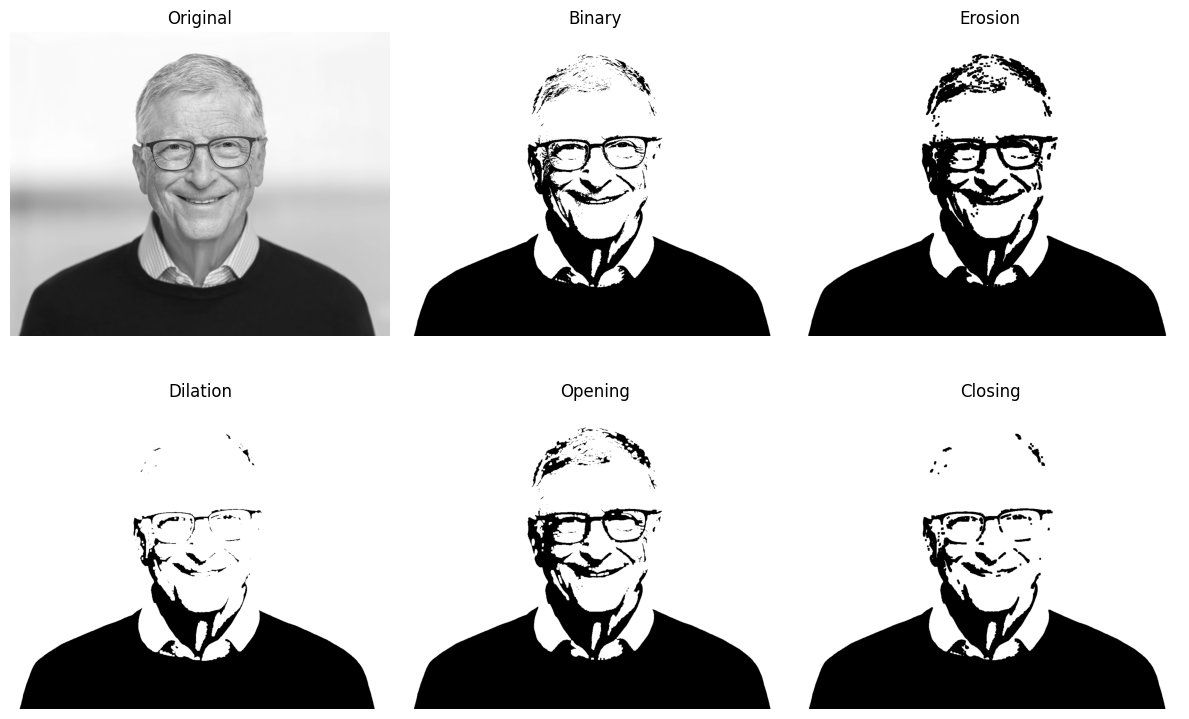

In [ ]:
# Membuat elemen struktural berukuran 5x5
kernel = np.ones((5, 5), np.uint8)

# Operasi dasar
erosion = cv2.erode(binary_image, kernel, iterations=1)
dilation = cv2.dilate(binary_image, kernel, iterations=1)

# Operasi lanjutan
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Menyusun semua hasil untuk ditampilkan
titles = ['Original', 'Binary', 'Erosion', 'Dilation', 'Opening', 'Closing']
images = [image, binary_image, erosion, dilation, opening, closing]
# Tampilkan dengan matplotlib
plt.figure(figsize=(12, 8))
for i in range(6):
  plt.subplot(2, 3, i + 1)
  plt.imshow(images[i], cmap='gray')
  plt.title(titles[i])
  plt.axis('off')
plt.tight_layout()
plt.show()